In [ ]:
# This program applies machine learning algorithms to the "all_data.csv" dataset, located in the same directory.
# Algorithms used: Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors.
# Output: A CSV file containing performance metrics (filename, algorithm, accuracy, precision, recall, F1-score, time) and a folder with generated graphs.

In [ ]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Intrusion Detection System/"
# Define directories and files
result_file = os.path.join(base_path, "results", "results_3.csv")
csv_file = os.path.join(base_path, "all_data.csv")
graph_folder = os.path.join(base_path, "results", "result_graph_3")

In [ ]:
def folder(f_name):
    if not os.path.exists(f_name):
        os.makedirs(f_name)

# Create necessary folders if they do not exist
folder(os.path.join(base_path, "results"))
folder(graph_folder)

In [ ]:
# Define ML algorithms
ml_list = {
    "Naive Bayes": GaussianNB(),
    "QDA": QDA(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "AdaBoost": AdaBoostClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500),
    "Nearest Neighbors": KNeighborsClassifier(3)
}

In [ ]:
# List of features to be imported (7 features + Label)
features = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets",
            "Fwd Packet Length Std", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total", "Label"]

seconds = time.time()  # overall timer
repetition = 10

In [ ]:
# Create CSV file to save results
with open(result_file, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Time"])

# Load the dataset
df = pd.read_csv(csv_file, usecols=features)
df = df.fillna(0)

In [ ]:
# Convert labels to binary (BENIGN -> 1, others -> 0)
df["Label"] = df["Label"].apply(lambda x: 1 if x == "BENIGN" else 0)

y = df["Label"]
X = df.drop(columns=["Label"])

In [ ]:
# Write results to CSV
with open(result_file, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["ML Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Time"])

# Store results for bar chart
results = {}

In [ ]:
# Process each ML algorithm
for model_name, model in ml_list.items():
    accuracies, precisions, recalls, f1_scores, times_list = [], [], [], [], []

    for _ in range(repetition):
        start_time = time.time()

        # Split data (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        # Train and predict
        clf = model.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        # Record metrics
        accuracies.append(clf.score(X_test, y_test))
        precisions.append(precision_score(y_test, predictions, average='macro'))
        recalls.append(recall_score(y_test, predictions, average='macro'))
        f1_scores.append(f1_score(y_test, predictions, average='macro'))
        times_list.append(time.time() - start_time)

    # Calculate averages
    avg_acc = round(np.mean(accuracies), 3)
    avg_prec = round(np.mean(precisions), 3)
    avg_rec = round(np.mean(recalls), 3)
    avg_f1 = round(np.mean(f1_scores), 3)
    avg_time = round(np.mean(times_list), 4)

    results[model_name] = [avg_acc, avg_prec, avg_rec, avg_f1]

    # Write detailed results to CSV (using the average values)
    with open(result_file, "a", newline="", encoding="utf-8") as f:
        wrt = csv.writer(f)
        wrt.writerow(["all_data", model_name, avg_acc, avg_prec, avg_rec, avg_f1, avg_time])

    print(f"Model: {model_name}, Accuracy: {avg_acc}, Precision: {avg_prec}, Recall: {avg_rec}, F1: {avg_f1}, Time: {avg_time}")


Model: Naive Bayes, Accuracy: 0.817, Precision: 0.659, Recall: 0.634, F1: 0.644, Time: 1.4365
Model: QDA, Accuracy: 0.857, Precision: 0.749, Recall: 0.674, F1: 0.7, Time: 2.376
Model: Random Forest, Accuracy: 0.945, Precision: 0.966, Recall: 0.836, F1: 0.885, Time: 17.5493
Model: ID3, Accuracy: 0.952, Precision: 0.932, Recall: 0.89, F1: 0.909, Time: 10.6461
Model: AdaBoost, Accuracy: 0.932, Precision: 0.912, Recall: 0.831, F1: 0.865, Time: 127.8899
Model: MLP, Accuracy: 0.839, Precision: 0.743, Recall: 0.538, F1: 0.53, Time: 231.6571
Model: Nearest Neighbors, Accuracy: 0.967, Precision: 0.94, Recall: 0.94, F1: 0.94, Time: 211.9977


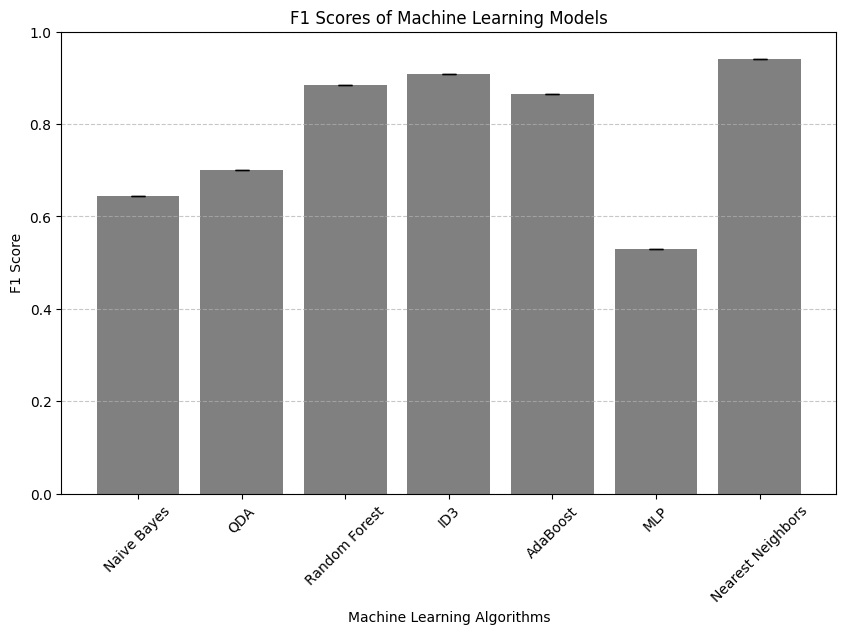

Total operation time: 6080.447727680206 seconds


In [ ]:
import matplotlib.pyplot as plt

# Define the machine learning model names and thei# Create a bar chart F1-score for all models
metrics_labels = ["Accuracy", "Precision", "Recall", "F1-score"]
n_metrics = len(metrics_labels)
n_models = len(ml_list)
x = np.arange(n_models)
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics_labels):
    values = [results[model][i] for model in ml_list]
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel("ML Algorithms")
ax.set_ylabel("Scores")
ax.set_title("ML Models Performance Comparison on All Data")
ax.set_xticks(x + width * (n_metrics - 1) / 2)
ax.set_xticklabels(list(ml_list.keys()), rotation=30)
ax.legend()

# Save the grouped bar chart to Google Drive as a PDF
plt.savefig(os.path.join(graph_folder, "ML_Model_Comparison.pdf"), bbox_inches="tight", format="pdf")
plt.show()

print("Total operation time:", time.time() - seconds, "seconds")